In [1]:
# Install tensorflow (if not installed)
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached wrapt-1.17.2-cp312-cp312-macosx_11_0_a

In [2]:
import numpy as np 
from ml import * 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(y_train, labels_train), (y_test, labels_test) = mnist.load_data()

In [4]:
y_train = (y_train.reshape(y_train.shape[0], -1).astype(np.float32))
y_test = (y_test.reshape(y_test.shape[0], -1).astype(np.float32))

y_train = np.where(y_train > 0, 1, 0)
y_test = np.where(y_test > 0, 1, 0)

noise = np.random.normal(loc=0.0, scale=0.6, size=y_test[0].shape)
X_train, X_test = y_train + noise, y_test + noise

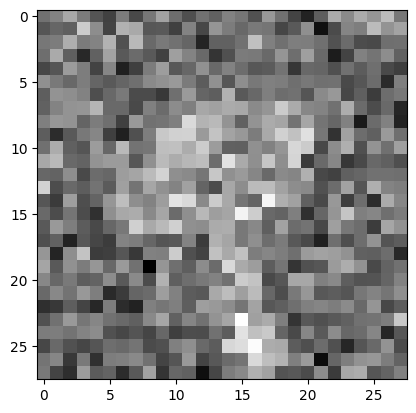

In [5]:
plt.imshow(X_train[4].reshape(28,28), cmap='gray')

In [6]:
X_train.shape

(60000, 784)

In [7]:
model = Model()
model.add(Dense(784, 32))
model.add(ReLU())
model.add(Dense(32, 8))
model.add(ReLU())
model.add(Dense(8, 8))
model.add(ReLU())
model.add(Dense(8, 32))
model.add(ReLU())
model.add(Dense(32, 784))
model.add(Sigmoid())

model.set(loss=MeanSquareError(),
          optimizer=Adam(learning_rate=0.001),
          accuracy=AccuracyRegression())

model.finalize()

In [8]:
model.summary(X_train.shape[1])

╔══════════════════════════════════════╗
║          Model Architecture          ║
╠════╬═════════╬══════════════╬════════╣
║ #  ║ Layer   ║ Output Shape ║ Params ║
╠════╬═════════╬══════════════╬════════╣
║ 1  ║ Dense   ║ (None, 32)   ║  25120 ║
║ 2  ║ ReLU    ║ (None, 32)   ║      0 ║
║ 3  ║ Dense   ║ (None, 8)    ║    264 ║
║ 4  ║ ReLU    ║ (None, 8)    ║      0 ║
║ 5  ║ Dense   ║ (None, 8)    ║     72 ║
║ 6  ║ ReLU    ║ (None, 8)    ║      0 ║
║ 7  ║ Dense   ║ (None, 32)   ║    288 ║
║ 8  ║ ReLU    ║ (None, 32)   ║      0 ║
║ 9  ║ Dense   ║ (None, 784)  ║  25872 ║
║ 10 ║ Sigmoid ║ (None, 784)  ║      0 ║
╚════╩═════════╩══════════════╩════════╝
Total trainable parameters: 51,616


In [ ]:
model.train(X_train, y_train, epochs=60, batch_size=64, print_every=100, validation_data=(X_test, y_test))

epoch: 1
step: 0, acc: 0.522 loss: 0.250 data_loss: 0.250 reg_loss: 0.000 lr: 0.001
step: 100, acc: 0.841 loss: 0.102 data_loss: 0.102 reg_loss: 0.000 lr: 0.001
step: 200, acc: 0.843 loss: 0.099 data_loss: 0.099 reg_loss: 0.000 lr: 0.001
step: 300, acc: 0.839 loss: 0.104 data_loss: 0.104 reg_loss: 0.000 lr: 0.001
step: 400, acc: 0.842 loss: 0.098 data_loss: 0.098 reg_loss: 0.000 lr: 0.001
step: 500, acc: 0.845 loss: 0.096 data_loss: 0.096 reg_loss: 0.000 lr: 0.001
step: 600, acc: 0.842 loss: 0.096 data_loss: 0.096 reg_loss: 0.000 lr: 0.001
step: 700, acc: 0.842 loss: 0.096 data_loss: 0.096 reg_loss: 0.000 lr: 0.001
step: 800, acc: 0.839 loss: 0.101 data_loss: 0.101 reg_loss: 0.000 lr: 0.001
step: 900, acc: 0.849 loss: 0.095 data_loss: 0.095 reg_loss: 0.000 lr: 0.001
step: 937, acc: 0.838 loss: 0.100 data_loss: 0.100 reg_loss: 0.000 lr: 0.001
training, acc: 660.667 loss: 0.106 data_loss: 0.106 reg_loss: 0.000 lr: 0.001
validation, acc: 664.454 loss: 0.096
epoch: 2
step: 0, acc: 0.858 lo

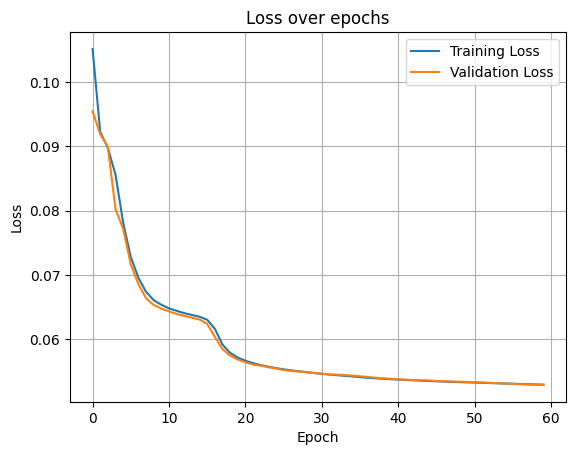

validation, acc: 726.507 loss: 0.053


In [ ]:
model.plot_loss()
model.evaluate(X_test, y_test)


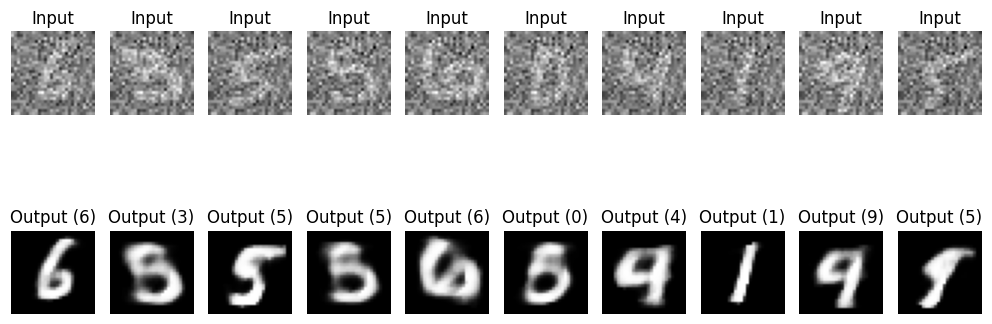

In [ ]:
plt.figure(figsize=(10, 5))

for i in range(10):
    # Översta raden: input
    ax = plt.subplot(2, 10, i + 1)
    ax.imshow(X_test[i+50].reshape(28, 28), cmap='gray')
    ax.set_title("Input")
    ax.axis('off')

    # Undre raden: prediction
    ax = plt.subplot(2, 10, 10 + i + 1)
    ax.imshow(model.predict(X_test[i+50]).reshape(28, 28), cmap='gray')
    ax.set_title(f"Output ({labels_test[i+50]})")
    ax.axis('off')

plt.tight_layout()
plt.show()

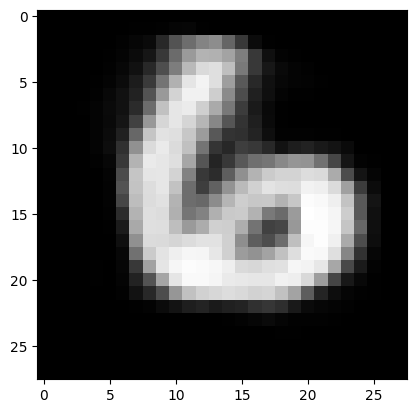

In [ ]:
plt.imshow(model.predict(X_test[100]).reshape(28,28), cmap='gray')